In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [4]:
df = pd.read_csv("smartphone_cleaned_v5.csv")
df.head()

,brand_name,model,price,rating,has_5g,has_nfc,has_ir_blaster,processor_brand,num_cores,processor_speed,battery_capacity,fast_charging_available,fast_charging,ram_capacity,internal_memory,screen_size,refresh_rate,resolution,num_rear_cameras,num_front_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto
0,oneplus,OnePlus 11 5G,54999,89.0,True,True,False,snapdragon,8.0,3.2,5000.0,1,100.0,12.0,256.0,6.70,120,1440 x 3216,3,1.0,android,50.0,16.0,0,NaN
1,oneplus,OnePlus Nord CE 2 Lite 5G,19989,81.0,True,False,False,snapdragon,8.0,2.2,5000.0,1,33.0,6.0,128.0,6.59,120,1080 x 2412,3,1.0,android,64.0,16.0,1,1024.0
2,samsung,Samsung Galaxy A14 5G,16499,75.0,True,False,False,exynos,8.0,2.4,5000.0,1,15.0,4.0,64.0,6.60,90,1080 x 2408,3,1.0,android,50.0,13.0,1,1024.0
3,motorola,Motorola Moto G62 5G,14999,81.0,True,False,False,snapdragon,8.0,2.2,5000.0,1,NaN,6.0,128.0,6.55,120,1080 x 2400,3,1.0,android,50.0,16.0,1,1024.0
4,realme,Realme 10 Pro Plus,24999,82.0,True,False,False,dimensity,8.0,2.6,5000.0,1,67.0,6.0,128.0,6.70,120,1080 x 2412,3,1.0,android,108.0,16.0,0,NaN


### `Univariate Analysis`

`brand_name`

In [7]:
df['brand_name'].value_counts()

brand_name
xiaomi       134
samsung      132
vivo         111
realme        97
oppo          88
motorola      52
apple         46
oneplus       42
poco          41
tecno         33
iqoo          32
infinix       29
huawei        16
google        14
nokia         13
honor         13
itel          10
sony           9
asus           7
nubia          6
nothing        5
lava           4
jio            4
gionee         3
micromax       3
oukitel        3
lg             3
redmi          3
letv           3
ikall          3
royole         2
doogee         2
zte            2
lenovo         2
lyf            2
sharp          1
tcl            1
cat            1
leitz          1
duoqin         1
leeco          1
blu            1
vertu          1
tesla          1
cola           1
blackview      1
Name: count, dtype: int64

<Axes: xlabel='brand_name'>

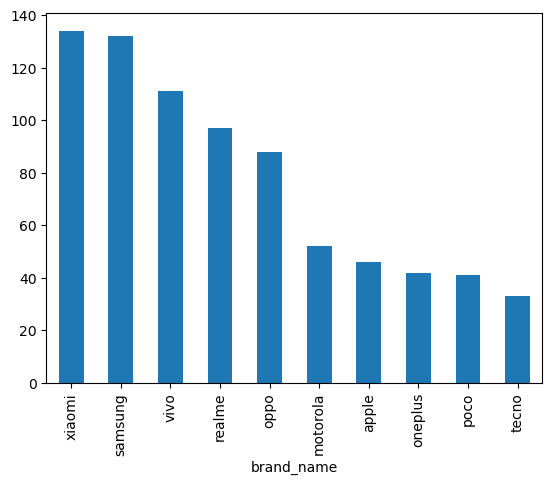

In [8]:
# Plot a graph of top 5 brands.
df['brand_name'].value_counts().head(10).plot(kind='bar')

<Axes: ylabel='count'>

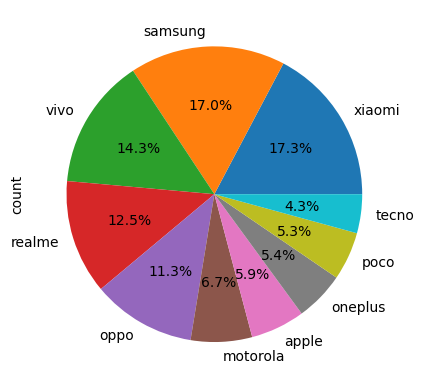

In [9]:
df['brand_name'].value_counts().head(10).plot(kind='pie', autopct="%0.1f%%")

In [11]:
df['brand_name'].isnull().sum()

0

In [14]:
# model.
df['model'].nunique()

980

`price`:  output column

In [15]:
# price
df['price'].describe()

count       980.000000
mean      32520.504082
std       39531.812669
min        3499.000000
25%       12999.000000
50%       19994.500000
75%       35491.500000
max      650000.000000
Name: price, dtype: float64

- The distribution is not normal.It has to be skewed.
- It has outlier in the data. 

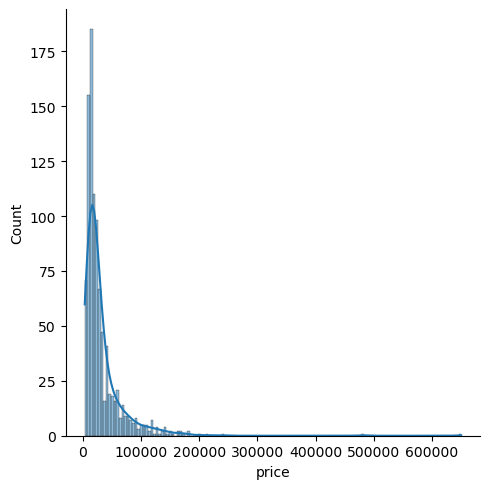

In [16]:
sns.displot(kind='hist', data=df, x='price', kde=True)

In [17]:
df['price'].skew() # normal. 

6.591790999665567

<Axes: ylabel='price'>

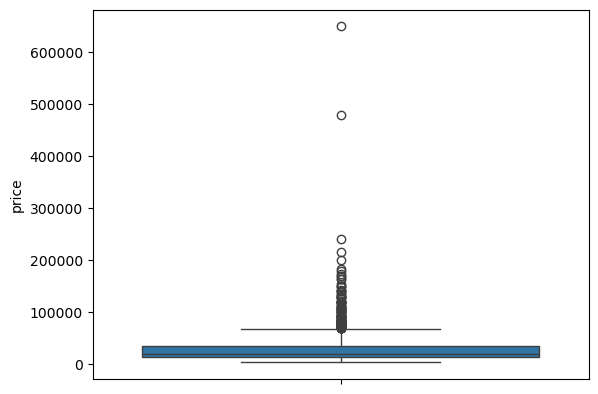

In [18]:
sns.boxplot(df['price'])

In [20]:
df[df['price'] > 200000]

,brand_name,model,price,rating,has_5g,has_nfc,has_ir_blaster,processor_brand,num_cores,processor_speed,battery_capacity,fast_charging_available,fast_charging,ram_capacity,internal_memory,screen_size,refresh_rate,resolution,num_rear_cameras,num_front_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto
427,vertu,Vertu Signature Touch,650000,62.0,False,True,False,snapdragon,8.0,1.50,2275.0,0,NaN,2.0,64.0,4.70,60,1080 x 1920,1,1.0,android,13.0,2.1,0,NaN
478,huawei,Huawei Mate 50 RS Porsche Design,239999,81.0,False,True,True,snapdragon,8.0,3.20,4700.0,1,66.0,12.0,512.0,6.74,120,1212 x 2616,3,1.0,other,50.0,13.0,1,256.0
887,xiaomi,Xiaomi Redmi K20 Pro Signature Edition,480000,88.0,False,True,False,snapdragon,8.0,2.80,4000.0,1,27.0,8.0,256.0,6.39,60,1080 x 2340,3,1.0,android,48.0,20.0,0,NaN
951,huawei,Huawei Mate 30 RS Porsche Design,214990,NaN,True,True,True,kirin,8.0,2.86,4500.0,1,NaN,12.0,512.0,6.53,60,1176 x 2400,4,2.0,android,40.0,32.0,1,256.0


In [21]:
df['price'].isnull().sum()

0

`rating`

In [24]:
df['rating'].describe()

count    879.000000
mean      78.258248
std        7.402854
min       60.000000
25%       74.000000
50%       80.000000
75%       84.000000
max       89.000000
Name: rating, dtype: float64

* The ratings are spread out from the average by about 7.4 points. Most ratings are within ±7.4 of the mean (between ~71 and ~85).

`Conclusion`

* Most ratings are clustered between 74 and 84 (interquartile range).
* The middle rating is 80, which is very close to the mean (78.26), showing a fairly symmetrical distribution.
* The ratings don’t vary too wildly — standard deviation is 7.4, which is moderate.

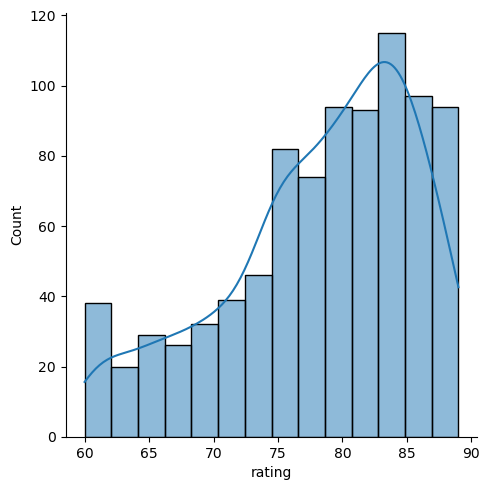

In [25]:
sns.displot(kind='hist', data=df, x='rating', kde=True)

In [26]:
df['rating'].skew() # Looks kinds of normal.

-0.6989993034105535

<Axes: ylabel='rating'>

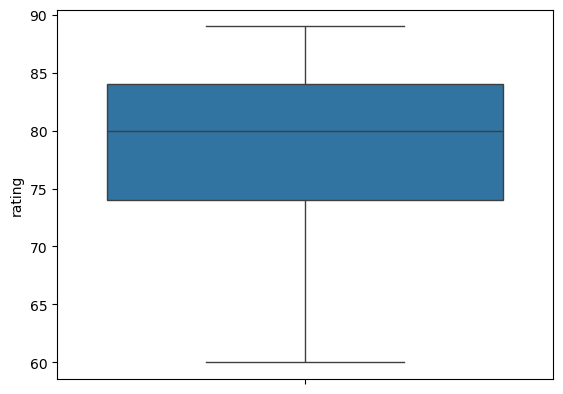

In [27]:
sns.boxplot(df['rating'])

In [ ]:
df['rating'].isnull().sum() # Contains some missing values.

101

In [31]:
df['rating'].isnull().sum() / 980

# Almost, 10% of the data are missing.

0.10306122448979592

`has_5g`

<Axes: ylabel='count'>

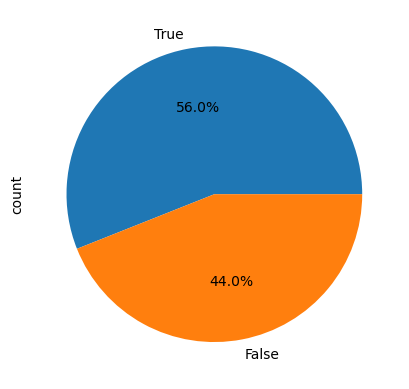

In [34]:
df['has_5g'].value_counts().plot(kind='pie', autopct="%0.1f%%")

`has_nfc`

<Axes: ylabel='count'>

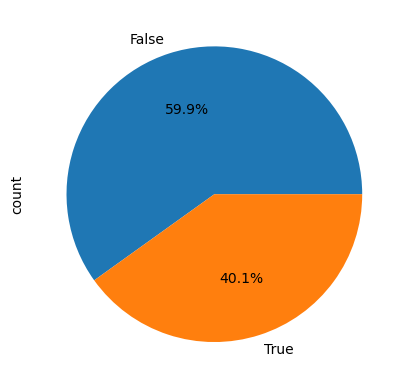

In [35]:
df['has_nfc'].value_counts().plot(kind='pie', autopct="%0.1f%%")

`has_ir_blaster`

<Axes: ylabel='count'>

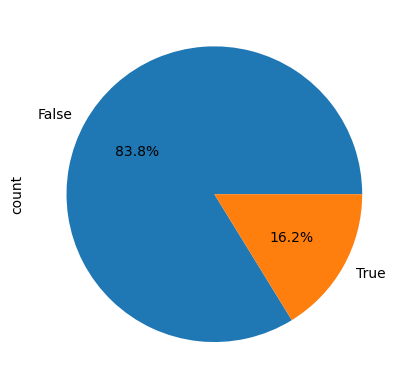

In [36]:
df['has_ir_blaster'].value_counts().plot(kind='pie', autopct="%0.1f%%")

In [37]:
df[df['has_ir_blaster'] == True]['brand_name'].value_counts()

brand_name
xiaomi     109
poco        30
iqoo         6
huawei       6
vivo         4
redmi        2
honor        1
samsung      1
Name: count, dtype: int64

`processor_brand`

<Axes: ylabel='count'>

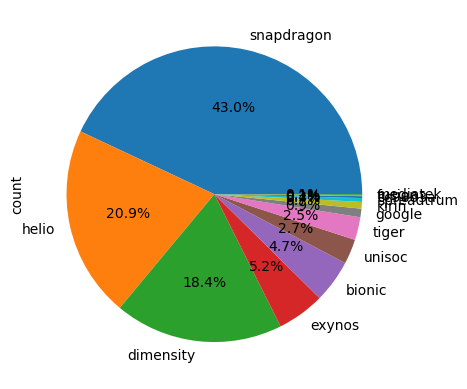

In [41]:
df['processor_brand'].value_counts().plot(kind='pie', autopct='%0.1f%%')

`num_cores`

<Axes: ylabel='count'>

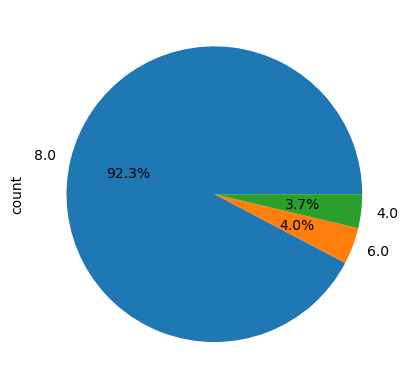

In [42]:
df['num_cores'].value_counts().plot(kind='pie', autopct='%0.1f%%')

`fast_charging`

<Axes: ylabel='count'>

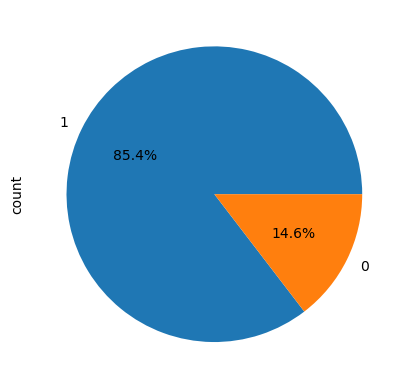

In [43]:
df['fast_charging_available'].value_counts().plot(kind='pie', autopct='%0.1f%%')

`ram_capacity`

<Axes: ylabel='count'>

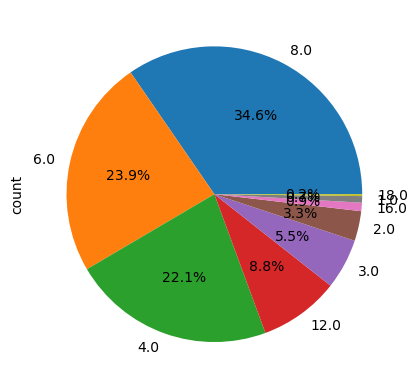

In [44]:
df['ram_capacity'].value_counts().plot(kind='pie', autopct='%0.1f%%')

`internal_memory`

<Axes: ylabel='count'>

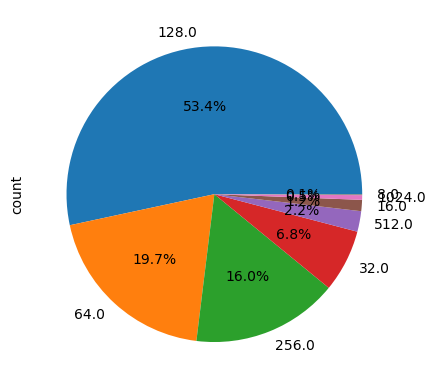

In [45]:
df['internal_memory'].value_counts().plot(kind='pie', autopct='%0.1f%%')

`refresh_rate`

<Axes: ylabel='count'>

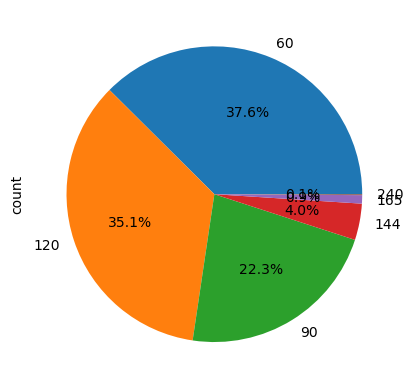

In [46]:
df['refresh_rate'].value_counts().plot(kind='pie', autopct='%0.1f%%')

In [48]:
df['refresh_rate'].value_counts()

refresh_rate
60     368
120    344
90     219
144     39
165      9
240      1
Name: count, dtype: int64

<Axes: ylabel='count'>

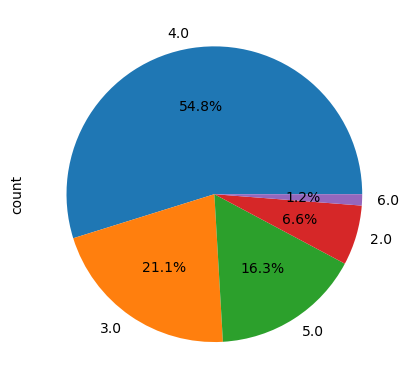

In [50]:
(df['num_rear_cameras'] + df['num_front_cameras']).value_counts().plot(kind='pie', autopct='%0.1f%%')

`os`

<Axes: ylabel='count'>

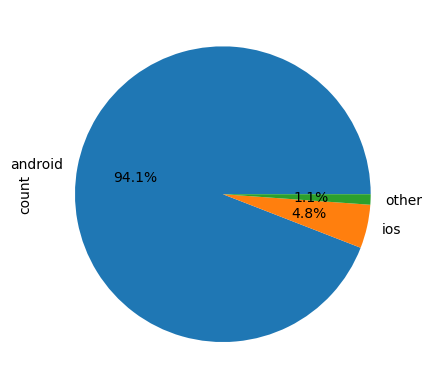

In [51]:
df['os'].value_counts().plot(kind='pie', autopct='%0.1f%%')

`extended_memory_available`

<Axes: ylabel='count'>

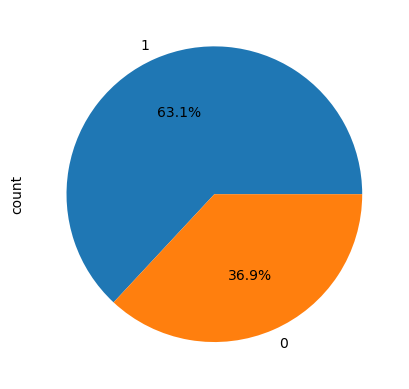

In [54]:
(df['extended_memory_available']).value_counts().plot(kind='pie', autopct='%0.1f%%')

`extended_upto`

<Axes: ylabel='count'>

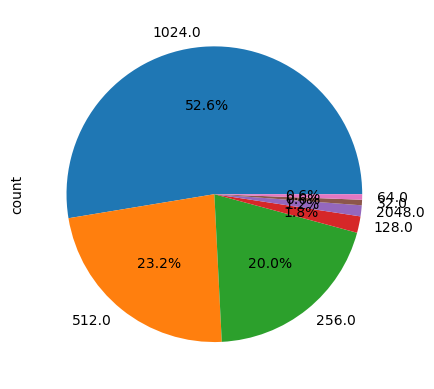

In [57]:
df['extended_upto'].value_counts().plot(kind='pie', autopct='%0.1f%%')

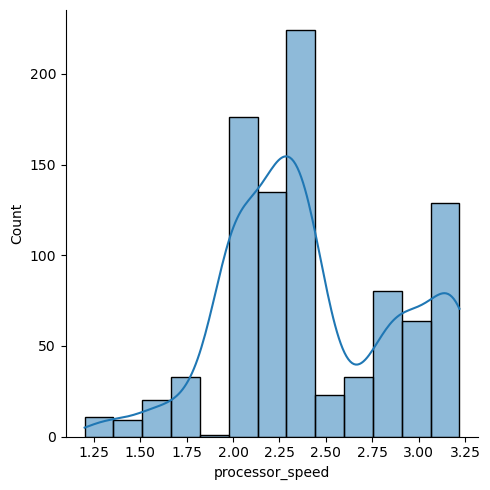

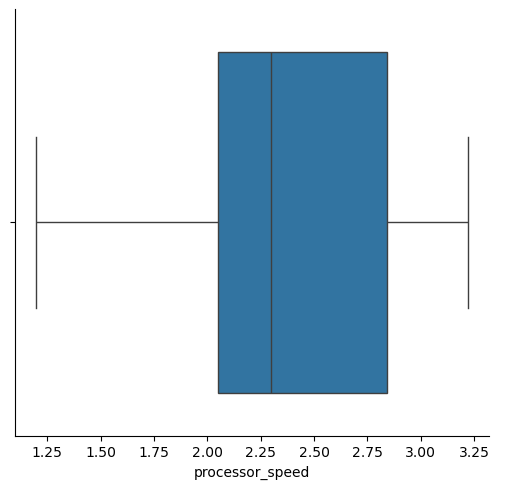

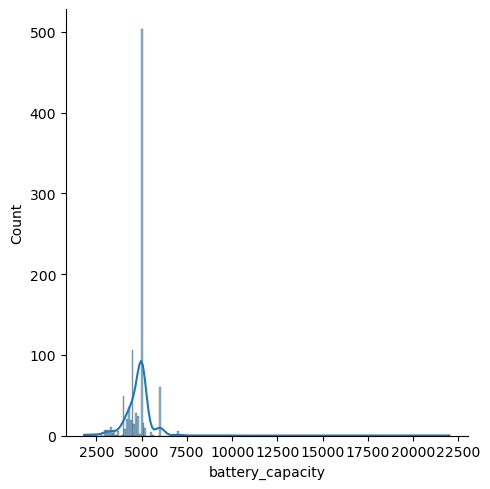

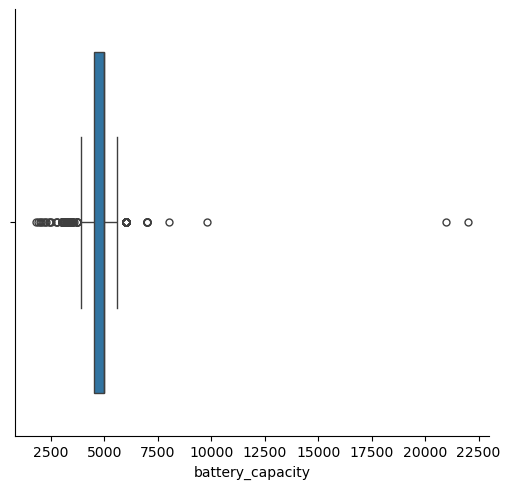

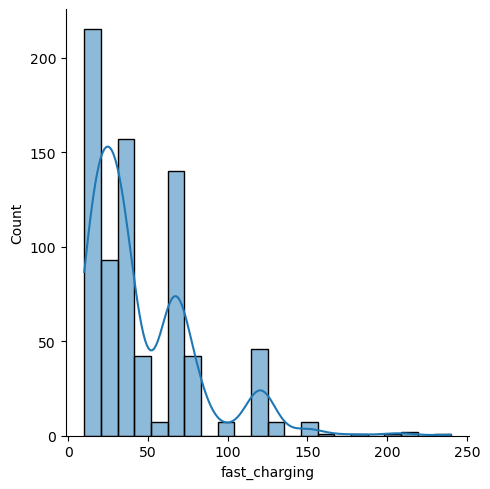

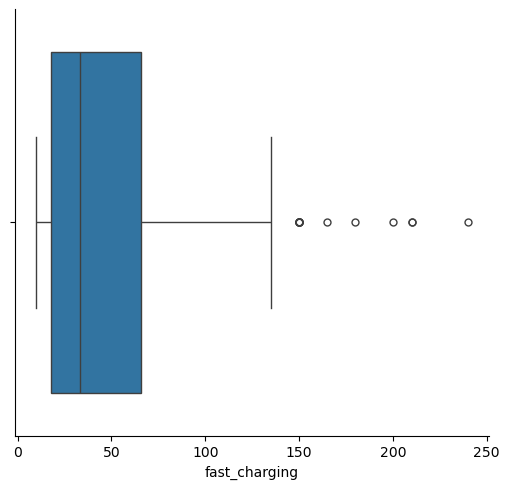

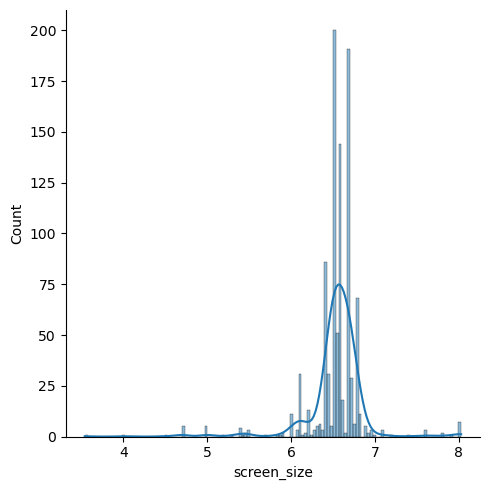

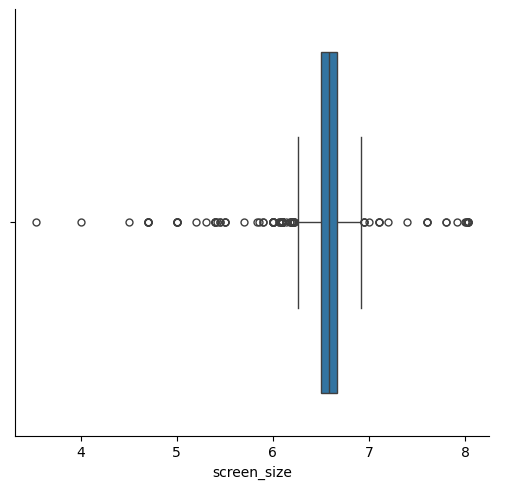

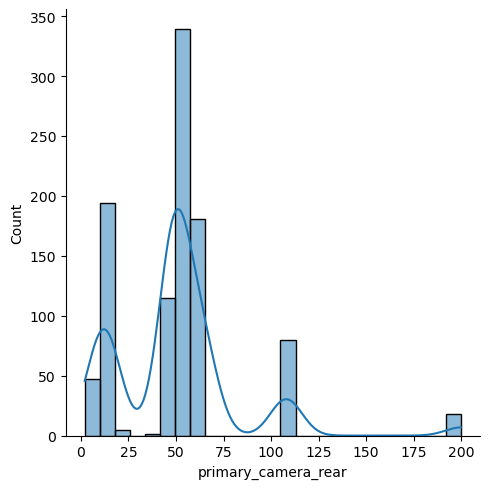

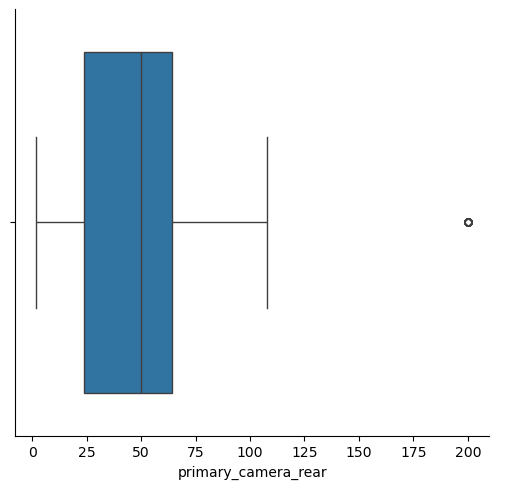

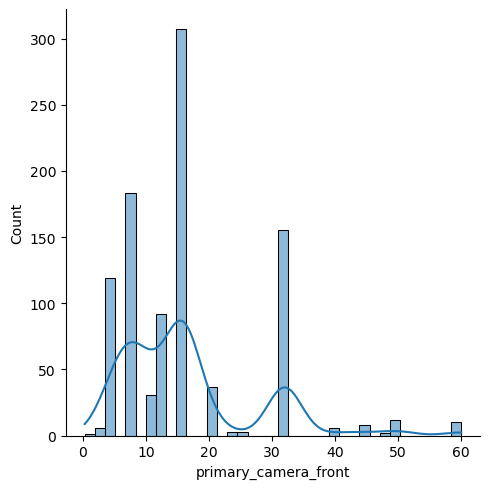

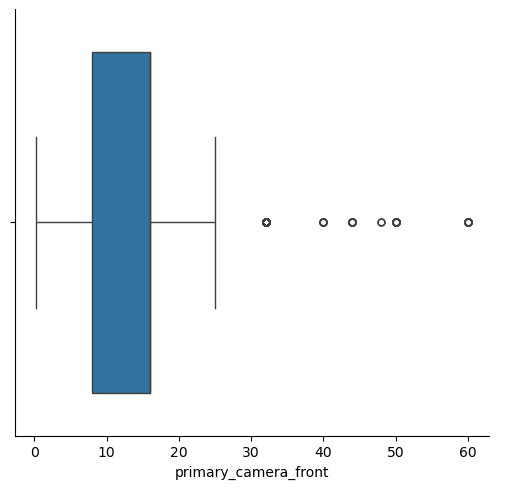

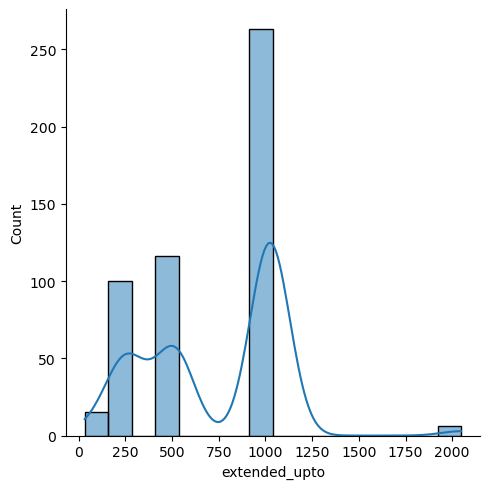

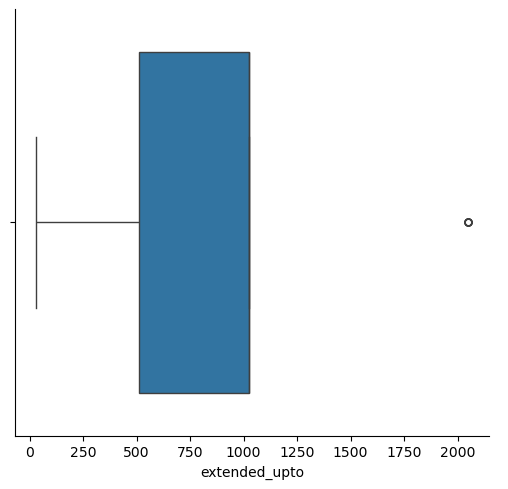

In [74]:
def plot_graphs(column_name):

  sns.displot(kind='hist',kde=True,data=df,x=column_name,label=column_name)
  sns.catplot(kind='box',data=df,x=column_name)

num_columns = df.select_dtypes(include=['float64','int64']).iloc[:,[3,4,6,9,13,14,16]].columns

for col in num_columns:
  plot_graphs(col)

In [75]:
df.columns

Index(['brand_name', 'model', 'price', 'rating', 'has_5g', 'has_nfc',
       'has_ir_blaster', 'processor_brand', 'num_cores', 'processor_speed',
       'battery_capacity', 'fast_charging_available', 'fast_charging',
       'ram_capacity', 'internal_memory', 'screen_size', 'refresh_rate',
       'resolution', 'num_rear_cameras', 'num_front_cameras', 'os',
       'primary_camera_rear', 'primary_camera_front',
       'extended_memory_available', 'extended_upto'],
      dtype='object')

### `Bivariate Analysis`

<Axes: xlabel='brand_name', ylabel='price'>

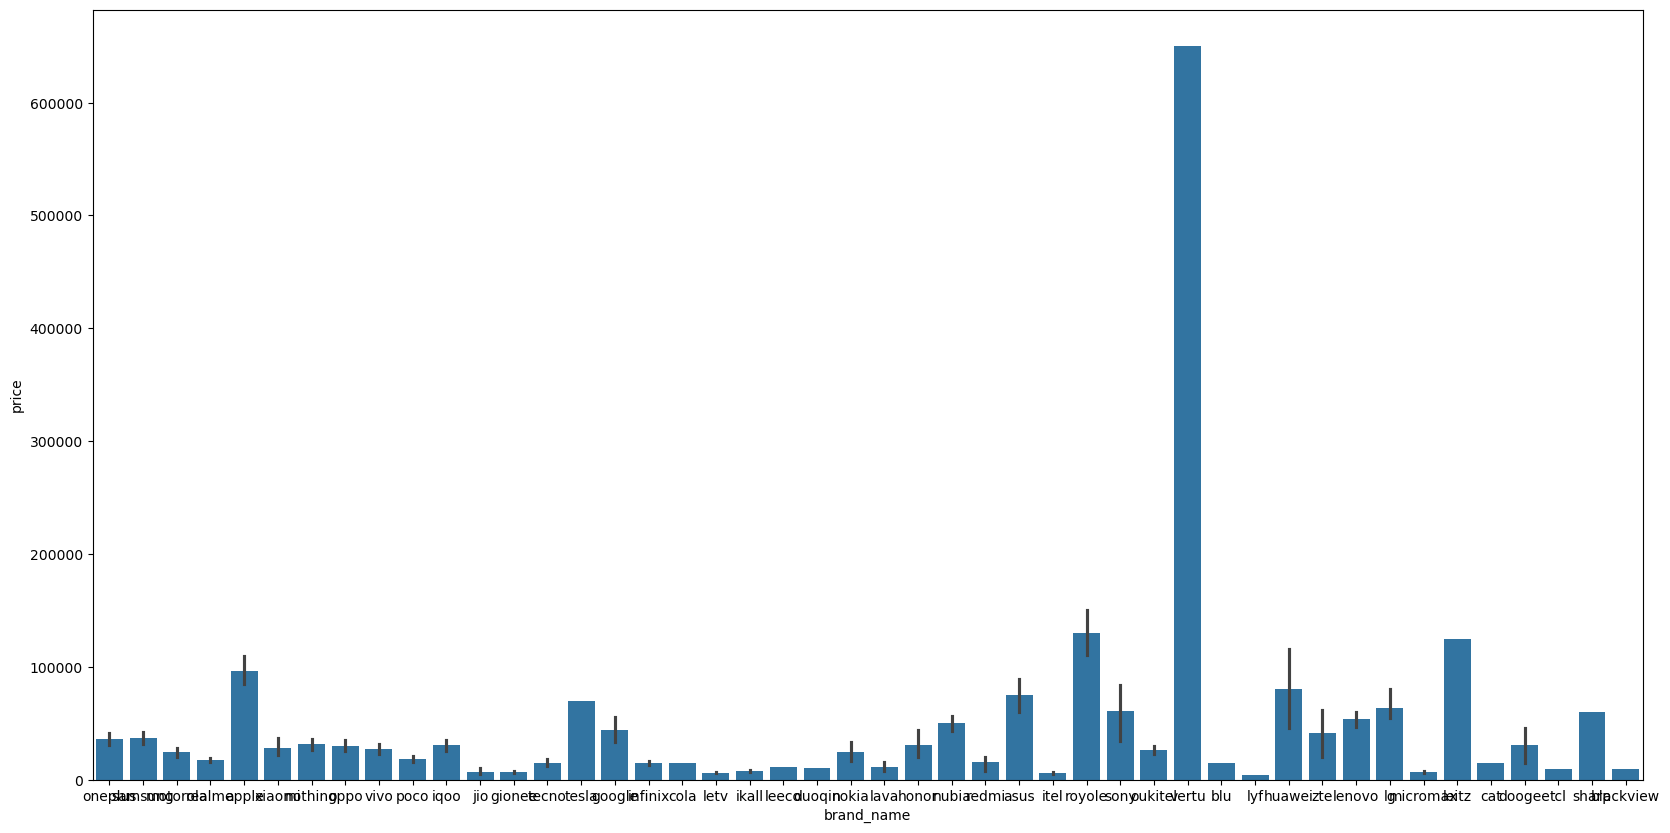

In [78]:
plt.figure(figsize=(20, 10))
sns.barplot(data=df, x='brand_name', y='price')

In [89]:
# In Order to fill the Missing values. 
# knn Imputer - Multivariate imputation techniques. 
df.shape

(980, 25)

In [94]:
x_df = df.select_dtypes(include=['int64', 'float64']).drop(columns='price')

from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
x_df_values = imputer.fit_transform(x_df)

x_df = pd.DataFrame(x_df_values, columns=x_df.columns).isnull().sum()

In [95]:
x_df['price'] = df['price']
x_df.head()

rating                     0
num_cores                  0
processor_speed            0
battery_capacity           0
fast_charging_available    0
dtype: object